# Main: Read in Sample and Iterate Models

## (Imports and Functions at Bottom)

In [190]:
df = pd.read_csv('EDA_df_3Mar17.csv')

In [191]:
len(df)

200000

In [192]:
df = add_features(df, True)

Calculating time deltas
Adding Hour and Day
Merging ratings data
Merging genres data
Bucketing continuous variables
Finished


In [143]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id', 'device_make', 'device_model',
                  'device_screen_height', 'device_screen_width', 'video_height_mode', 'video_width_mode',
                   'creative_language', 'n_vungle_installs_5groups', 'n_campaign_views_8groups', 
                   's_since_delivery_any_installed_app_8groups', 'creative_delivery_frequency_cap', 'same_language'
                   ,'n_user_ratings_2groups', 'user_rating_8groups', 'n_user_ratings_pub_5groups',
                   'ad_genres', 'pub_genres', 'request_hour', 'request_day_of_month', 'time_zone'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                       ('device_screen_width', 'video_width_mode'),
                       ('creative_language', 'country_code'),
                       ('ad_genres', 'pub_genres'),
                       ('request_hour', 'request_day_of_month'),
                       ('request_hour', 'time_zone'),
                       ('n_vungle_installs_5groups', 'n_campaign_views_8groups')
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=500)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_full = [train_ll, train_auc, test_ll, test_auc]
print(model_full)

[0.35458364524233654, 0.85134022474663329, 0.3970825447291732, 0.79083971179428914]


## Baseline Model

In [133]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id')
                       
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_baseline = [train_ll, train_auc, test_ll, test_auc]
print(model_baseline)

[0.38224628671139177, 0.82092085250298574, 0.41403764584261982, 0.76389509295065816]


## Device and Video Features

In [134]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id', 'device_make', 'device_model',
                  'device_screen_height', 'device_screen_width', 'video_height_mode', 'video_width_mode'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                       ('device_screen_width', 'video_width_mode')
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_device = [train_ll, train_auc, test_ll, test_auc]
print(model_device)

[0.37538673084168239, 0.83059272123102668, 0.41293960087559622, 0.76571797459616842]


## User features

In [144]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id',
                   'n_vungle_installs_5groups', 'n_campaign_views_8groups', 
                   's_since_delivery_any_installed_app_8groups'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                       ('n_vungle_installs_5groups', 'n_campaign_views_8groups')
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_users = [train_ll, train_auc, test_ll, test_auc]
print(model_users)

[0.36889743823755439, 0.83487052919625371, 0.39958290035993199, 0.78688807957709195]


## Creative Features

In [135]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id', 
                   'creative_language', 'creative_delivery_frequency_cap', 'same_language'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                       ('creative_language', 'country_code')
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_creatives = [train_ll, train_auc, test_ll, test_auc]
print(model_creatives)

[0.38201890680842315, 0.82104087716439311, 0.41401982439206192, 0.7638785806536752]


## Genre Features

In [138]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id',
                   'ad_genres', 'pub_genres'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                      
                       ('ad_genres', 'pub_genres')
                      
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_genres = [train_ll, train_auc, test_ll, test_auc]
print(model_genres)

[0.37817189713663263, 0.82417482968353784, 0.4126397239518102, 0.76596191158565441]


## Time/Date Features

In [139]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id',  'request_hour', 'request_day_of_month', 'time_zone'
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id'),
                       
                       ('request_hour', 'request_day_of_month'),
                       ('request_hour', 'time_zone')

                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_time_date = [train_ll, train_auc, test_ll, test_auc]
print(model_time_date)

[0.37859693130552224, 0.82602203306377331, 0.4138534811969814, 0.76391461404285277]


## Ratings Features

In [142]:
cat_features_pc = ['advertiser_app_store_id', 'country_code', 'publisher_app_store_id',
                   'n_user_ratings_2groups', 'user_rating_8groups', 'n_user_ratings_pub_5groups'
                   
                 ]
cont_features_pc = None
cat_interactions_pc = [('advertiser_app_store_id', 'publisher_app_store_id','country_code'),
                       ('advertiser_app_store_id', 'country_code'),
                       ('publisher_app_store_id', 'country_code'),
                       ('advertiser_app_store_id', 'publisher_app_store_id')
                      
                     ]
X_train, y_train, X_test, y_test = train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc)
model = LogisticRegression(C = .1, solver = 'sag', max_iter=200)
model.fit(X_train, y_train)

# Calculate prediction/probability of train and test
X_train_predictions = model.predict(X_train)
X_train_predprob = model.predict_proba(X_train)[:, 1]

X_test_predictions = model.predict(X_test)
X_test_predprob = model.predict_proba(X_test)[:, 1]

train_ll =  log_loss(y_train, X_train_predprob)
train_auc = roc_auc_score(y_train, X_train_predprob)
test_ll = log_loss(y_test, X_test_predprob)
test_auc = roc_auc_score(y_test, X_test_predprob)
model_ratings = [train_ll, train_auc, test_ll, test_auc]
print(model_ratings)

[0.38205228422889348, 0.82044643085312585, 0.41376691021595691, 0.76421768432048576]


## Organize model iterations into dataframe/csv

In [184]:
results_df = pd.DataFrame([model_baseline, model_users, model_genres, model_device, model_ratings,
                   model_time_date, model_creatives, model_full])

In [185]:
results_df.index = ['Baseline', '+User Data','+Genres','+Device/Video', '+Ratings', '+Time/Date', '+Creatives',  'Final Full Model']

In [186]:
results_df.columns = ['Train log-loss', 'Train AUC', 'Test log-loss', 'Test AUC']

In [162]:
results_df.to_csv('Model_iterations.csv')

In [187]:
# Also get in terms of % change from baseline
results_df2 = results_df
results_df2.iloc[1:, :] = (results_df.iloc[1:,:] - results_df.iloc[0,:]) / results_df.iloc[0,:]
results_df2.to_csv('model_iterations_percents.csv')

## get_n_buckets demo, with n_vungle_installs and n_campaign_views

In [196]:
df.n_vungle_installs.describe()

count         200000.0
mean           0.17811
std     0.731873968724
min                0.0
25%                0.0
50%                0.0
75%                0.0
max               47.0
Name: n_vungle_installs, dtype: float64

In [197]:
df.n_campaign_views.describe()

count       200000.0
mean        3.225385
std     41.947891541
min              0.0
25%              0.0
50%              0.0
75%              2.0
max           9735.0
Name: n_campaign_views, dtype: float64

(array([  1.99927000e+05,   4.40000000e+01,   2.00000000e+00,
          1.20000000e+01,   1.50000000e+01]),
 array([  0. ,   9.4,  18.8,  28.2,  37.6,  47. ]),
 <a list of 5 Patch objects>)

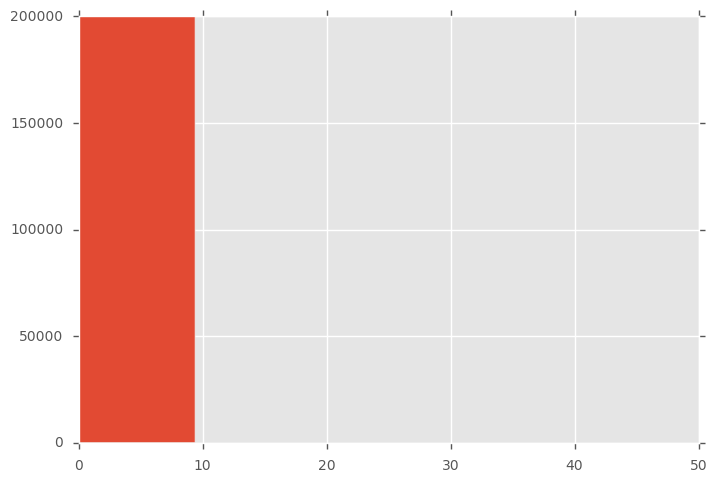

In [199]:
plt.hist(df.n_vungle_installs, bins=5)

### If histogram bins or n-tiles are used, 0's span multiple groups and no guarantee on number of unique groups. 'get_n_buckets' fixes that

In [338]:
df = add_grouping_columns(cont_feature='n_vungle_installs', df = df)
df.loc[:, 'n_vungle_installs_20groups'] = get_n_buckets(df.n_vungle_installs, 20)

/Users/PhilRotella/anaconda3/envs/msan/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


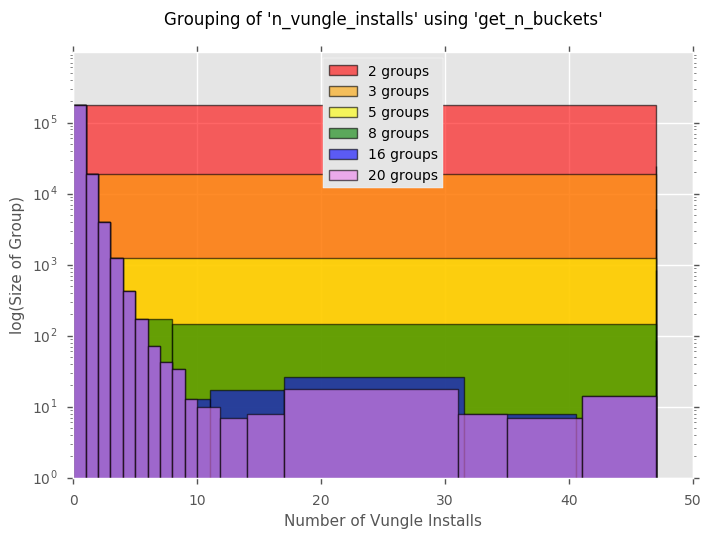

In [340]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
n_list = [2, 3, 5, 8, 16, 20]
fig, ax = plt.subplots()
for x in range(6):
    n = n_list[x]
    col = "n_vungle_installs_{}groups".format(n)
    vals = sorted(df[col].unique())
    counts = (df.groupby(col)[col].count())
    widths = [vals[i] - vals[i - 1] for i in range(1, len(vals))] + [max(vals) - vals[len(vals) - 1]]
    bars = [vals[i] - widths[i] for i in range(len(vals))]
    
    ax.bar(vals, counts, width = widths, log = True, alpha = .6, color = colors[x], label = "{} groups".format(n), linewidth = 1,edgecolor = 'black')

plt.yticks([10**x for x in range(6)])
plt.legend(loc = 'upper center')
plt.xlabel('Number of Vungle Installs')
plt.ylabel('log(Size of Group)')
plt.title("Grouping of 'n_vungle_installs' using 'get_n_buckets'\n")

### Notes: With 5 groups or less, all groups have at least 1000 rows (200k sample); not true with 8+ groups

In [209]:
df = add_grouping_columns(cont_feature='n_campaign_views', df = df)

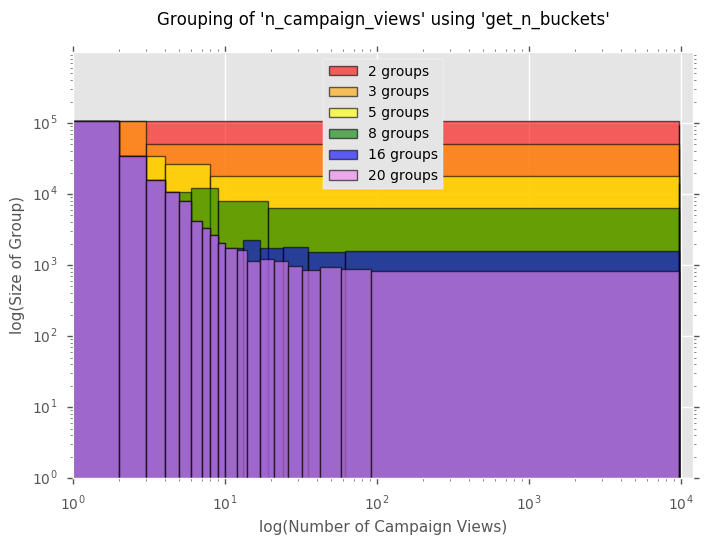

In [336]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
n_list = [2, 3, 5, 8, 16, 20]
fig, ax = plt.subplots()
for x in range(6):
    n = n_list[x]
    col = "n_campaign_views_{}groups".format(n)
    vals = [i + 1 for i in sorted(df[col].unique())]
    counts = (df.groupby(col)[col].count())
    widths = [vals[i] - vals[i - 1] for i in range(1, n)] + [max(vals) - vals[n - 1]]
    bars = [vals[i] - widths[i] for i in range(n)]
    
    ax.bar(vals, counts, width = widths, log = True, alpha = .6, color = colors[x], label = "{} groups".format(n), linewidth = 1,edgecolor = 'black')
ax.set_xscale("log", nonposx='clip')
plt.yticks([10**x for x in range(6)])
plt.xticks([10**x for x in range(5)])
plt.xlim([0, 10**4 + 2000])
plt.legend(loc = 0)
plt.xlabel('log(Number of Campaign Views)')
plt.ylabel('log(Size of Group)')
plt.title("Grouping of 'n_campaign_views' using 'get_n_buckets'\n")
plt.show()
plt.close()

### Note: With 16 groups or less, all groups have at least 1000 rows (200k sample); not true with 20+ groups

In [16]:
import mmh3
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import scale
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from matplotlib import pyplot as plt
%matplotlib inline

In [128]:
# Hashing function
def _murmur_32s(key, seed):
    if isinstance(key, unicode):
        bkey = key.encode('utf-8')
    elif isinstance(key, bytes):
        bkey = key
    else:
        #bkey= str(key)
        raise ValueError("the key must be either unicode or str. key: {}".format(key))
    return mmh3.hash(bkey, seed)

  
# Hash features of DataFrame X using the hashing function
def _transform(X, n_bits, categorical_features,
              continuous_features, interaction_features,
              store_fmap=False):
    n_samples = X.shape[0] \
        if isinstance(X, pd.DataFrame) \
        else len(X.values()[0])
    hash_mask = 2 ** n_bits - 1
    n_features = \
        len(categorical_features) + \
        len(continuous_features) + \
        len(interaction_features)
    n_hashed_features = n_samples * n_features
    # assert n_hashed_features > 0
    rows = np.empty(n_hashed_features, dtype=np.int32)
    cols = np.empty(n_hashed_features, dtype=np.int32)
    vals = np.zeros(n_hashed_features)
    hashed_feature_idx = 0
    f_map = {}

    for f in categorical_features:
        Xf = X[f]
        hash_seed = _murmur_32s(f, 0)
        for sample_idx in range(n_samples):
            hash_value = _murmur_32s(Xf[sample_idx], hash_seed)
            hash_sign = (hash_value >= 0) * 2 - 1

            if store_fmap:
                f_combined = ((f,), Xf[sample_idx])
                if f_combined not in f_map:
                    f_map[f_combined] = hash_value & hash_mask

            rows[hashed_feature_idx] = sample_idx
            cols[hashed_feature_idx] = hash_value & hash_mask
            vals[hashed_feature_idx] += hash_sign
            hashed_feature_idx += 1

    for f in continuous_features:
        Xf = X[f]
        hash_value = _murmur_32s(f, 0)
        hash_sign = (hash_value >= 0) * 2 - 1
        if store_fmap:
            f_combined = ((f,),)
            f_map[f_combined] = hash_value & hash_mask
        for sample_idx in range(n_samples):
            rows[hashed_feature_idx] = sample_idx
            cols[hashed_feature_idx] = hash_value & hash_mask
            vals[hashed_feature_idx] += hash_sign * Xf[sample_idx]
            hashed_feature_idx += 1

    for feature_names in interaction_features:
        hash_seed = 0
        for f in feature_names:
            hash_seed = _murmur_32s(f, hash_seed)

        for sample_idx in range(n_samples):
            hash_value = hash_seed
            interaction_value = 1

            value_cache = ()
            for f in feature_names:
                if f in continuous_features:
                    interaction_value *= X[f][sample_idx]
                    value_cache += (f,)
                else:
                    value_cache += (X[f][sample_idx],)
                    hash_value = _murmur_32s(
                        X[f][sample_idx], hash_value
                    )

            if store_fmap:
                f_combined = (feature_names, value_cache)
                if f_combined not in f_map:
                    f_map[f_combined] = hash_value & hash_mask

            hash_sign = (hash_value >= 0) * 2 - 1
            rows[hashed_feature_idx] = sample_idx
            cols[hashed_feature_idx] = hash_value & hash_mask
            vals[hashed_feature_idx] += hash_sign * interaction_value
            hashed_feature_idx += 1

    n_dim_hashed_features = hash_mask + 1

    # reverse k and v, if v is duplicated, append k to v
    f_map_rev = {}
    for k, v in f_map.items():
        if v not in f_map_rev:
            f_map_rev[v] = [k]
        else:
            f_map_rev[v] = f_map_rev[v] + [k]

    return sparse.coo_matrix(
        (vals, (rows, cols)),
        (n_samples, n_dim_hashed_features)
    ).tocsr(), f_map_rev

# Wrapper class for hashing function
class FeatureHasher(BaseEstimator, TransformerMixin):
    def __init__(self,
                 n_bits=22,
                 categorical_features=None,
                 continuous_features=None,
                 interaction_features=None,
                 store_fmap=False):
        if n_bits < 1 or n_bits > 31:
            raise ValueError("number of bits must be in interval [1, 31]")

        self.n_bits_ = n_bits
        self.categorical_features_ = set(categorical_features or [])
        self.continuous_features_ = set(continuous_features or [])
        self.interaction_features_ = set(interaction_features or [])
        self.store_fmap = store_fmap

        n_features = len(self.categorical_features_) + \
                     len(self.continuous_features_) + \
                     len(self.interaction_features_)
        if n_features == 0:
            raise ValueError("at least one features needs to be specified")

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return _transform(
            X, self.n_bits_, self.categorical_features_,
            self.continuous_features_, self.interaction_features_,
            self.store_fmap
        )

In [126]:
class FeatureCreator():
    """Augment DataFrame-like input with new features."""

    def transform(self, X, inplace=False):
        # TODO probably it's a good idea to restrict what fields from the
        #      DataFrame are used to avoid copying the whole thing
        if isinstance(X, pd.DataFrame):
            X = {k: v.values for k, v in X.iteritems()}
        if not inplace:
            X = {k: np.copy(v) for k, v in X.iteritems()}
        return X

    def fit(self, X, y=None):
        return self

In [127]:
def preprocessing_data(df, cat_features, cont_features, is_train=False):
    """
    clean data
    """
    columns = {feature : str for feature in cat_features}
    if is_train:
        columns['is_install'] = int
    df = set_column_types(df, columns)
    df = fillna0(df, columns.keys())
    
    # So the hash function doesn't break with nan
    df = convert_to_unknown(df, cat_features)
    if cont_features is not None:
        df = scale_continuous(df, cont_features)  
    return df

def convert_to_unknown(df, columns):
    """
    convert NA to 'UNK'
    """
    if isinstance(df, pd.DataFrame):
        for col in columns:
            df[col].fillna("UNK", inplace=True)
    if isinstance(df, dict):
        for col in columns:
            df[col][pd.isnull(df[col])] = "UNK"
    return df

def scale_continuous(df, cont_cols):
    for col in cont_cols:
        try:
            df.loc[-df[col].isnull(), col] = scale(df.loc[-df[col].isnull(), col])
            df.loc[df[col].isnull(), col] = 0
        except ValueError:
            print("error with {}".format(col))
            df[col] = 0
    return df

def fillna0(df, columns):
    if isinstance(df, pd.DataFrame):
        for col in columns:
            df[col].fillna(0, inplace=True)
    if isinstance(df, dict):
        for col in columns:
            df[col][pd.isnull(df[col])] = 0
    return df

def set_column_types(df, column_types_dict):
    if isinstance(column_types_dict, dict):
        for c, t in column_types_dict.items():
            df[c] = df[c].astype(t)
        return df 
    else:
        raise TypeError()

In [17]:
def add_features(df, is_train = False):
    df.loc[:, 'time_of_this_request'] = pd.to_datetime(df.time_of_this_request, errors='coerce')
    df.loc[:, 'time_of_last_delivery_any_installed_app'] = pd.to_datetime(df.time_of_last_delivery_any_installed_app,  errors='coerce')
    
    if is_train:
        df.loc[:, 'is_install'] = (1.0 * ~df.timestamp_at_install.isnull())
  
  #language
    df.loc[:, 'same_language'] = (df.creative_language == df.device_language)
  
    #time deltas
    print("Calculating time deltas")
    df.loc[:, 's_since_delivery_any_installed_app'] = (pd.to_datetime(df.time_of_this_request, errors='coerce') - pd.to_datetime(df.time_of_last_delivery_any_installed_app, errors='coerce')).dt.seconds
  
  # Time info 
    print ("Adding Hour and Day")
    df.loc[:, 'request_hour'] = df.time_of_this_request.dt.hour
    df.loc[:, 'request_day_of_month'] = df.time_of_this_request.dt.day
    df.loc[:, 'request_day_of_week'] = df.time_of_this_request.dt.dayofweek
    df.loc[df.request_day_of_week.isin([0, 1, 5, 6]), 'request_day_of_week_3groups'] = 'A'
    df.loc[df.request_day_of_week.isin([2, 3]), 'request_day_of_week_3groups'] = 'B'
    df.loc[df.request_day_of_week == 4, 'request_day_of_week_3groups'] = 'C'
    
    df.loc[df.time_zone == 'nan','time_zone'] = np.nan
    request_times = pd.DatetimeIndex(df.time_of_this_request).tz_localize('UTC')
    for tz in df.time_zone.unique():
        df.loc[df.time_zone == tz, 'tz_request_hour'] = pd.to_datetime(request_times[df.time_zone == tz].tz_convert(tz)).hour
    
    print("Merging ratings data")
    #ratings
    df = merge_ratings(df)

    print("Merging genres data")
    #genres
    df = merge_genres(df)

    print("Bucketing continuous variables")  
    #convert continuous to categorical groups
    df = bucket_continuous(df)
  
    print("Finished")
    return df

def get_n_buckets(cont_feature, n):
    new_feature = pd.Series(['U' for x in range(len(cont_feature))])
    cont_feature = pd.to_numeric(cont_feature, errors = 'coerce')
    ntile = -1000000
    for i in range(n):
        new_ntile = np.nanpercentile(cont_feature.loc[cont_feature > ntile], 100 / (n - i))
        new_feature.loc[(cont_feature > ntile) & (cont_feature <= new_ntile)] = new_ntile
        ntile = new_ntile
    new_feature.loc[cont_feature > ntile] = cont_feature.max()
    return new_feature
  
def merge_ratings(df):  
    df.loc[:, 'user_rating'] = df.loc[:, ['android_user_rating_ad','ios_current_version_user_rating_ad']].max(axis=1)
    df.loc[:, 'n_user_ratings'] = df.loc[:, ['android_n_user_ratings_ad','ios_n_current_version_user_ratings_ad']].max(axis=1)
    df.loc[:, 'user_rating_pub'] = df.loc[:, ['android_user_rating_pub','ios_current_version_user_rating_pub']].max(axis=1)
    df.loc[:, 'n_user_ratings_pub'] = df.loc[:, ['android_n_user_ratings_pub','ios_n_current_version_user_ratings_pub']].max(axis=1)
    return df

def merge_genres(df):    
    df.loc[:, 'ad_genres'] = df.android_categories_ad
    df.loc[df.android_categories_ad.isnull(), 'ad_genres'] = df.loc[df.android_categories_ad.isnull(), 'ios_genres_ad']
    df.loc[:, 'pub_genres'] = df.android_categories_pub
    df.loc[df.android_categories_pub.isnull(), 'pub_genres'] = df.loc[df.android_categories_pub.isnull(), 'ios_genres_pub']
    return df

def bucket_continuous(df):    
    groupings = [('n_vungle_installs', 5),
               ('n_campaign_views', 8), 
               ('s_since_delivery_any_installed_app', 8),
               ('n_user_ratings', 2),
               ('user_rating', 8),
               ('n_user_ratings_pub', 5)
               ]
    for col, n in groupings:
        new_colname = "{}_{}groups".format(col, n)
        df.loc[:, new_colname] = get_n_buckets(df[col], n)
    return df

In [9]:
def add_grouping_columns(df, cont_feature):
    for n in [2, 3, 5, 8, 16]:
        df.loc[:, '{}_{}groups'.format(cont_feature, n)] = get_n_buckets(df[cont_feature], n)
    return df    

In [130]:
def train_test(df, cat_features_pc, cont_features_pc, cat_interactions_pc):
    X_clf = preprocessing_data(df, cat_features_pc, cont_features_pc, True)
    train, test = train_test_split(X_clf, test_size=0.3, random_state = 27)  # splitting Train into Train/Test sets
    y_train = train.is_install
    X_train = train.loc[:, [x for x in train.columns if x != 'is_install']]
    y_test = test.is_install
    X_test = test.loc[:, [x for x in train.columns if x != 'is_install']]
    # Feature Hashing
    #print('Feature Creating/Hashing Train')
    feature_creator = FeatureCreator()
    design_matrix_transformer = FeatureHasher(20, cat_features_pc, cont_features_pc, cat_interactions_pc, store_fmap=True) # You can experiment with hasher bits (we used 18 here)

    X_test = feature_creator.transform(X_test, inplace=True)
    X_test, f_map = design_matrix_transformer.fit_transform(X_test)

    X_train = feature_creator.transform(X_train, inplace=True)
    X_train, f_map = design_matrix_transformer.fit_transform(X_train)
    return (X_train, y_train, X_test, y_test)